In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
im = Image.open('../data/test_images/test_image_png_1.png')
im.show()

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [3]:
def rgb2gray(frame):
        return np.dot(frame[..., :3], [0.2989, 0.5870, 0.1140])

In [4]:
def whiten_and_filter(frame, r):

    def cart2pol(x, y):
        rho = np.sqrt(x ** 2 + y ** 2)
        phi = np.arctan2(y, x)

        return rho, phi

    h, w = frame.shape
    imf = np.fft.fftshift(np.fft.fft2(frame))
    fx, fy = np.meshgrid(np.arange(-w / 2, w / 2), np.arange(-h / 2, h / 2))
    rho, theta = cart2pol(fx, fy)
    filtf = rho * np.exp(-0.5 * (rho / (0.7 * r / 2)) ** 2)
    imwf = filtf * imf
    imw = np.real(np.fft.ifft2(np.fft.fftshift(imwf)))

    return imw

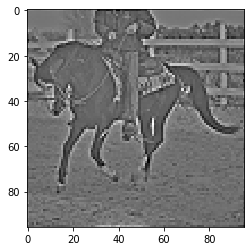

In [5]:
im_array = np.array(im)

frame = rgb2gray(im_array)
frame = whiten_and_filter(frame, 500)

plt.imshow(frame, cmap='gray')

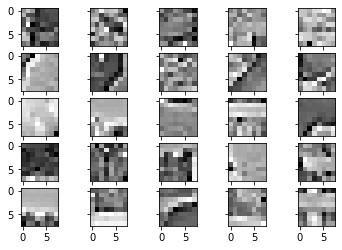

In [8]:
from sklearn.feature_extraction.image import extract_patches_2d

n = 25

patches = extract_patches_2d(frame, patch_size=(8,8), max_patches=n)

fig, axes = plt.subplots(5,5) 
for i, ax in enumerate(axes.flatten()):
    ax.imshow(patches[i], cmap='gray')
    ax.label_outer()
